In [25]:
import numpy as np
import tensorflow as tf
import cv2
import os
import glob
import matplotlib.pyplot as plt

##### Training data preprocessing

In [26]:
### Read bounding box annotations - training set
data_dir = "../wider_face/data"
with open(os.path.join(data_dir, "wider_face_split/wider_face_train_bbx_gt.txt"), "r") as file: 
    bbox_anno = [line.rstrip("\n, ") for line in file.readlines()]

In [27]:
### Create a dictionary such that it contains image_name:respective_annotations 
img_indices = []
n_bbxes = []
for i in range(len(bbox_anno)):
    if bbox_anno[i].endswith((".jpg", ".jpeg", ".png")):
        img_indices.append(i)
        n_bbxes.append(int(bbox_anno[i+1]))
dic = {}
for idx,n in list(zip(img_indices, n_bbxes)):
    img_name = bbox_anno[idx]
    res_annot = bbox_anno[idx+2 : idx+2+n]
    ### Remove blur, expression, illumination, invalid, occlusion and pose details. Keep x1, y1, w and h.
    res_annot = [" ".join(annot.split()[:4]) for annot in res_annot]
    dic[img_name] = res_annot

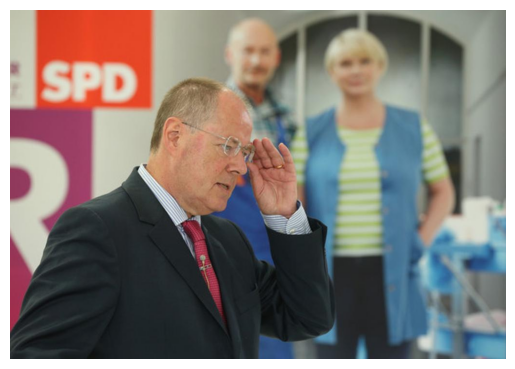

In [85]:
### Display random images from the training set
rand_n = np.random.randint(len(dic))
rand_img = list(dic.items())[rand_n]
bgr = cv2.imread(os.path.join(data_dir, "WIDER_train/images", rand_img[0]))
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis("off")
plt.show()

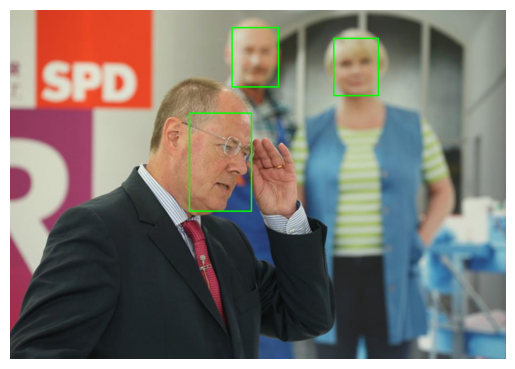

In [86]:
for annot in rand_img[1]:
    x, y, w, h = [int(pt) for pt in annot.split()]
    cv2.rectangle(rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(rgb)
plt.axis("off")
plt.show()